# Custom Models and Training with TensorFlow

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.config.experimental.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Using Tensorflow like NumPy

In [4]:
t = tf.constant([1,2,3,4,5,6], shape=(2,3), dtype = 'float32')

In [5]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [6]:
t.shape

TensorShape([2, 3])

In [7]:
t[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 5., 6.], dtype=float32)>

In [8]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [9]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [10]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

tf.square(t)

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
tf.exp(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

Some functions have a different name than in NumPy; for instance, tf.reduce_mean(), tf.reduce_sum(), tf.reduce_max(), and tf.math.log() are the equivalent of np.mean(), np.sum(), np.max() and np.log(). 

### Using Keras.backend

In [13]:
from tensorflow import keras

In [14]:
K = keras.backend

In [15]:
K.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

## Tensors and NumPy

In [16]:
import numpy as np
a = np.array([2,4,6], dtype = np.float32)

In [17]:
a.dtype

dtype('float32')

In [18]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [19]:
type(t.numpy())

numpy.ndarray

In [20]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 4., 16., 36.], dtype=float32)>

In [21]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Type Conversions

Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types.

In [22]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [23]:
tf.constant(2.) + tf.constant(2., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]

In [24]:
tf.constant(2.) + tf.constant(2.)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

### Casting

In [25]:
t2 = tf.constant(400, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=402.0>

## Variables

In [26]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [27]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [28]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [29]:
v[:,2].assign([5, 5])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  5.],
       [ 8., 10.,  5.]], dtype=float32)>

In [30]:
v.scatter_nd_update(indices=[[0,0],[1,2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   5.],
       [  8.,  10., 200.]], dtype=float32)>

## Customizing Models and Training Algorithms

### Custom Loss Functions

In [31]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - .5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=259)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=259)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

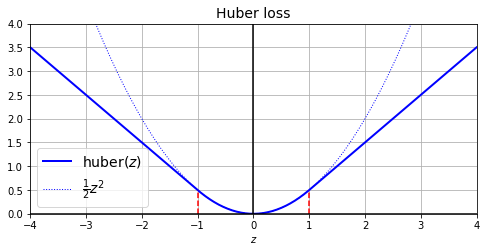

In [35]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}  z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [36]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [37]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [38]:
model.fit(X_train_scaled, y_train, epochs=30,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6101 - mae: 0.9621 - val_loss: 0.2367 - val_mae: 0.5392
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2133 - mae: 0.5049 - val_loss: 0.2200 - val_mae: 0.5154
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2016 - mae: 0.4874 - val_loss: 0.2116 - val_mae: 0.5030
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.1958 - mae: 0.4803 - val_loss: 0.2104 - val_mae: 0.5012
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.1924 - mae: 0.4747 - val_loss: 0.2055 - val_mae: 0.4943
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.1891 - mae: 0.4707 - val_loss: 0.2023 - val_mae: 0.4893
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.1866 - mae: 0.4677 - val_loss: 0.2014 - val_mae: 0.4906
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.

### Saving and Loading Models That Contain Custom Components

In [39]:
model.save('model_withh_custom_loss.h5')

In [40]:
model = keras.models.load_model('model_withh_custom_loss.h5', custom_objects={'huber_fn': huber_fn})

In [41]:
model.fit(X_train_scaled, y_train, epochs = 15, validation_data=(X_valid_scaled, y_valid))

Epoch 1/15
363/363 [==============================] - 1s 4ms/step - loss: 0.1683 - mean_absolute_error: 0.4377 - val_loss: 0.1818 - val_mean_absolute_error: 0.4553
Epoch 2/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1662 - mean_absolute_error: 0.4343 - val_loss: 0.1879 - val_mean_absolute_error: 0.4663
Epoch 3/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1672 - mean_absolute_error: 0.4357 - val_loss: 0.1798 - val_mean_absolute_error: 0.4534
Epoch 4/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1652 - mean_absolute_error: 0.4327 - val_loss: 0.1843 - val_mean_absolute_error: 0.4600
Epoch 5/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1658 - mean_absolute_error: 0.4330 - val_loss: 0.1788 - val_mean_absolute_error: 0.4562
Epoch 6/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1647 - mean_absolute_error: 0.4315 - val_loss: 0.1817 - val_mean_absolute_error: 0.4545
Epoch 7/15
363/3

In [42]:
def create_huber(threshold = 1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [43]:
model.compile(loss=create_huber(2.0), optimizer="nadam")

In [44]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 0.1800 - val_loss: 0.1963
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.1791 - val_loss: 0.1998


In [45]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [46]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [47]:

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 0.1780 - val_loss: 0.1950
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.1779 - val_loss: 0.1954


In [48]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [50]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [51]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 4ms/step - loss: 0.7286 - mae: 0.9379 - val_loss: 0.2995 - val_mae: 0.5655
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2549 - mae: 0.5235 - val_loss: 0.2717 - val_mae: 0.5326


In [52]:
model.save("my_model_with_a_custom_loss_class.h5")

In [53]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                               custom_objects={"HuberLoss": HuberLoss})

In [54]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2367 - mean_absolute_error: 0.5032 - val_loss: 0.2569 - val_mean_absolute_error: 0.5213
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2284 - mean_absolute_error: 0.4939 - val_loss: 0.2508 - val_mean_absolute_error: 0.5155


In [55]:
model.loss.threshold

2.0